In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime
import re
import time
import scipy
from scipy import stats
import seaborn


# Pup Inflation: Analysing Tweets

In [2]:
dog_rates_tweets = pd.read_csv('dog_rates_tweets.csv')
#dog_rates_tweets
only_ratings = dog_rates_tweets

In [3]:
#keeping tweets with ratings
only_ratings['ratings']=dog_rates_tweets['text'].str.extract(r'(\d+(\.\d+)?)/10')[0]




In [4]:
#Get rid of NaN
only_ratings = only_ratings[~only_ratings['ratings'].isnull()]
only_ratings

,id,created_at,text,ratings
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13
35,991399795892916224,2018-05-01 19:31:45,This is B-Mo. He has a heart on his butt and h...,13
41,990987750601093120,2018-04-30 16:14:26,Say hello to Meatball. I’m told he actually lo...,13
50,989657223084244992,2018-04-27 00:07:23,This is Oakley. He picked you some flowers. Ho...,14
55,989300750152069120,2018-04-26 00:30:53,Meet Max. She pouts until someone holds her. A...,12
59,989176681243070464,2018-04-25 16:17:53,This is Trout. He lives a life of luxury. Prob...,13


In [5]:
only_ratings = only_ratings.astype({"ratings": float})
#removing outlyers
only_ratings= only_ratings.drop(only_ratings[only_ratings.ratings > 25].index)
only_ratings

,id,created_at,text,ratings
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0
35,991399795892916224,2018-05-01 19:31:45,This is B-Mo. He has a heart on his butt and h...,13.0
41,990987750601093120,2018-04-30 16:14:26,Say hello to Meatball. I’m told he actually lo...,13.0
50,989657223084244992,2018-04-27 00:07:23,This is Oakley. He picked you some flowers. Ho...,14.0
55,989300750152069120,2018-04-26 00:30:53,Meet Max. She pouts until someone holds her. A...,12.0
59,989176681243070464,2018-04-25 16:17:53,This is Trout. He lives a life of luxury. Prob...,13.0


In [6]:
#creating timestamps
only_ratings['created_at'] = only_ratings['created_at'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))


/home/sarbjot/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


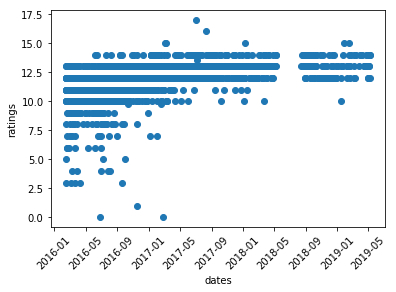

In [7]:
plt.plot(only_ratings['created_at'], only_ratings['ratings'],marker='o',linestyle= ' ' )
plt.xticks(rotation=45)
plt.xlabel("dates")
plt.ylabel("ratings")
plt.show()


## Linear Fitting

In [8]:
#function to turn datetime objects to seconds
def to_timestamp(dt_obj):
    return dt_obj.timestamp()
    
only_ratings['timestamp'] = only_ratings['created_at'].apply(to_timestamp)
only_ratings

,id,created_at,text,ratings,timestamp
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09
35,991399795892916224,2018-05-01 19:31:45,This is B-Mo. He has a heart on his butt and h...,13.0,1.525203e+09
41,990987750601093120,2018-04-30 16:14:26,Say hello to Meatball. I’m told he actually lo...,13.0,1.525105e+09
50,989657223084244992,2018-04-27 00:07:23,This is Oakley. He picked you some flowers. Ho...,14.0,1.524788e+09
55,989300750152069120,2018-04-26 00:30:53,Meet Max. She pouts until someone holds her. A...,12.0,1.524703e+09
59,989176681243070464,2018-04-25 16:17:53,This is Trout. He lives a life of luxury. Prob...,13.0,1.524673e+09


In [9]:
fit = stats.linregress(only_ratings['timestamp'],only_ratings['ratings'])
fit.intercept, fit.slope

(-40.46415480898916, 3.515929974847721e-08)

In [10]:
only_ratings['prediction'] = only_ratings['timestamp']*fit.slope+fit.intercept
only_ratings

,id,created_at,text,ratings,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09,13.185763
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09,13.181785
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09,13.179609
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09,13.167614
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09,13.163804
35,991399795892916224,2018-05-01 19:31:45,This is B-Mo. He has a heart on his butt and h...,13.0,1.525203e+09,13.160918
41,990987750601093120,2018-04-30 16:14:26,Say hello to Meatball. I’m told he actually lo...,13.0,1.525105e+09,13.157464
50,989657223084244992,2018-04-27 00:07:23,This is Oakley. He picked you some flowers. Ho...,14.0,1.524788e+09,13.146311
55,989300750152069120,2018-04-26 00:30:53,Meet Max. She pouts until someone holds her. A...,12.0,1.524703e+09,13.143323
59,989176681243070464,2018-04-25 16:17:53,This is Trout. He lives a life of luxury. Prob...,13.0,1.524673e+09,13.142283


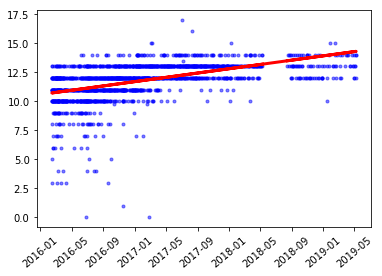

In [11]:
plt.xticks(rotation=40)
plt.plot(only_ratings['created_at'], only_ratings['ratings'],'b.',alpha = 0.5)
plt.plot(only_ratings['created_at'],only_ratings['prediction'],'r-', linewidth=3)
plt.show()